The data is formatted as JSON separated by newline. Using pandas to read dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

dataframe = pd.read_json("./Software_5.json", lines=True)


Exploratory data analysis on overall rating column

In [2]:
dataframe["overall"].describe()


count    12805.000000
mean         3.877860
std          1.362086
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

Plotting pie chart and bar chart for overall score distribution. The 'overall' column has 5 labels: 1.0, 2.0, 3.0, 4.0, 5.0 where 1.0 is very bad, 3.0 is neutral and 5.0 is very good.

As can be seen, we have unbalanced data here with over 40% of reviews are very good, while only 11.7% of review is very bad

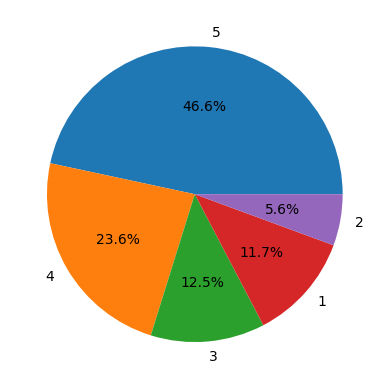

<AxesSubplot: >

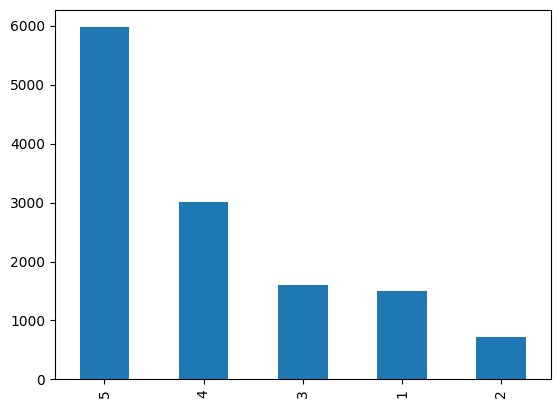

In [3]:
scores = dataframe["overall"].value_counts()
plt.pie(scores, labels=scores.index, autopct='%1.1f%%')
plt.show()

dataframe['overall'].value_counts().plot(kind='bar')

Now we look at review comments. Notice that we have 1 datapoint that has no review text. We will do some preprocessing steps on the text here

In [37]:
print("Null review text count:", dataframe["reviewText"].isnull().sum())
dataframe.dropna(inplace=True, subset=["reviewText"])
print("Null review text count:", dataframe["reviewText"].isnull().sum())
# Convert all texts to lowercase and strip
dataframe["reviewText"] = dataframe["reviewText"].apply(str.lower).apply(str.strip)



Null review text count: 0
Null review text count: 0


Now get the average review length and average review read time. To visualize this, we use a boxplot

Statistic of text length
 count    12804.000000
mean       992.974852
std       1493.988115
min          2.000000
25%        178.000000
50%        542.000000
75%       1240.000000
max      31643.000000
Name: reviewText, dtype: float64


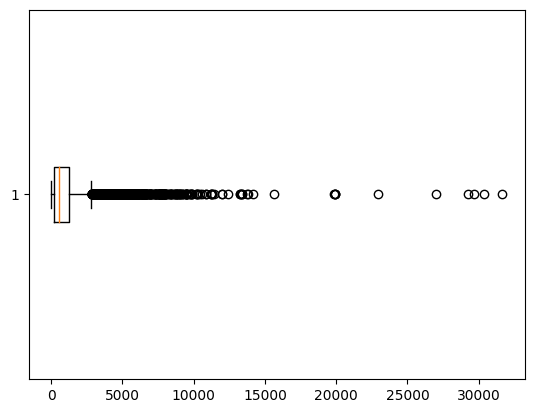

In [38]:
text_length = dataframe["reviewText"].apply(len)
print("Statistic of text length\n", text_length.describe())
# To visualize this, we use boxplot
plt.boxplot(text_length, vert=False)
plt.show()


Top 100 words in review text. Note that we also remove stop words here. Stop words are words that give little context to the sentence

In [39]:
from sklearn.feature_extraction import text

series = pd.Series(
    ' '.join(dataframe['reviewText']).split()).value_counts()[:100]

# Drop English stop words
series.drop(text.ENGLISH_STOP_WORDS, errors="ignore")



software    8341
windows     7356
use         7040
like        6581
just        6201
program     5593
it's        5105
version     4921
-           4564
new         4478
using       4456
used        4175
product     4064
don't       3966
time        3876
good        3789
need        3509
easy        3477
really      3472
does        3453
computer    3425
i've        3238
office      3171
it.         3056
want        3038
i'm         2961
work        2959
great       2890
norton      2748
make        2720
dtype: int64